z =  [ -7.16028404e-22  -3.53244996e-21  -1.73643682e-20  -8.49616988e-20
  -4.13196126e-19  -1.99351629e-18  -9.51562313e-18  -4.47612634e-17
  -2.06266909e-16  -9.22264291e-16  -3.93423954e-15  -1.54779639e-14
  -5.15043682e-14  -9.84336459e-14   4.79579339e-13   8.28266124e-12
   7.66157327e-11   5.89919299e-10   4.13252699e-09   2.71435971e-08
   1.68688753e-07   9.87879705e-07   5.34617723e-06   2.53921341e-05
   8.97230082e-05   2.24930460e-05  -3.51987939e-03  -3.95749282e-02
  -2.12411048e-01   1.05536171e+00   4.16986920e-15]
p(4) =  -0.8
p30(4) =  -0.8


/home/jing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/jing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned


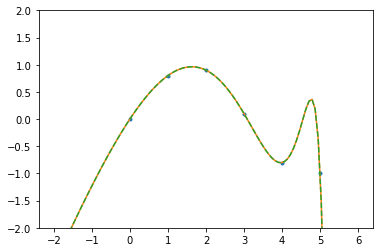

In [11]:
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 30)

# Show the polynomial coefficient
print('z = ', z)

# Create the polynomial object
p = np.poly1d(z)

# Evaluate the polynomial value at 4
print('p(4) = ', p(4))

# Evaluate the high order polynomial value at 4
p30 = np.poly1d(np.polyfit(x, y, 30))
print('p30(4) = ', p30(4))

# Draw the polynormail
import matplotlib.pyplot as plt
xp = np.linspace(-2, 6, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)
plt.show()

/home/jing/anaconda3/lib/python3.6/site-packages/numpy/polynomial/_polybase.py:804: RankWarning: The fit may be poorly conditioned
  res = cls._fit(xnew, y, deg, w=w, rcond=rcond, full=full)


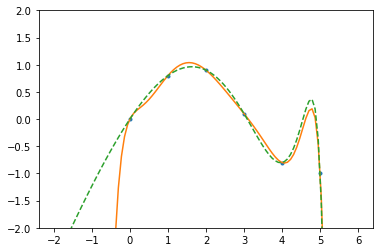

In [12]:
#Chebyshev polynomials

from numpy.polynomial import Chebyshev as T

p = T.fit(x, y, 10)

# Draw the polynormail
import matplotlib.pyplot as plt
xp = np.linspace(-2, 6, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)
plt.show()

# Wave Approximation

 len x =  100
 len my_data =  100


/home/jing/anaconda3/lib/python3.6/site-packages/numpy/polynomial/_polybase.py:804: RankWarning: The fit may be poorly conditioned
  res = cls._fit(xnew, y, deg, w=w, rcond=rcond, full=full)


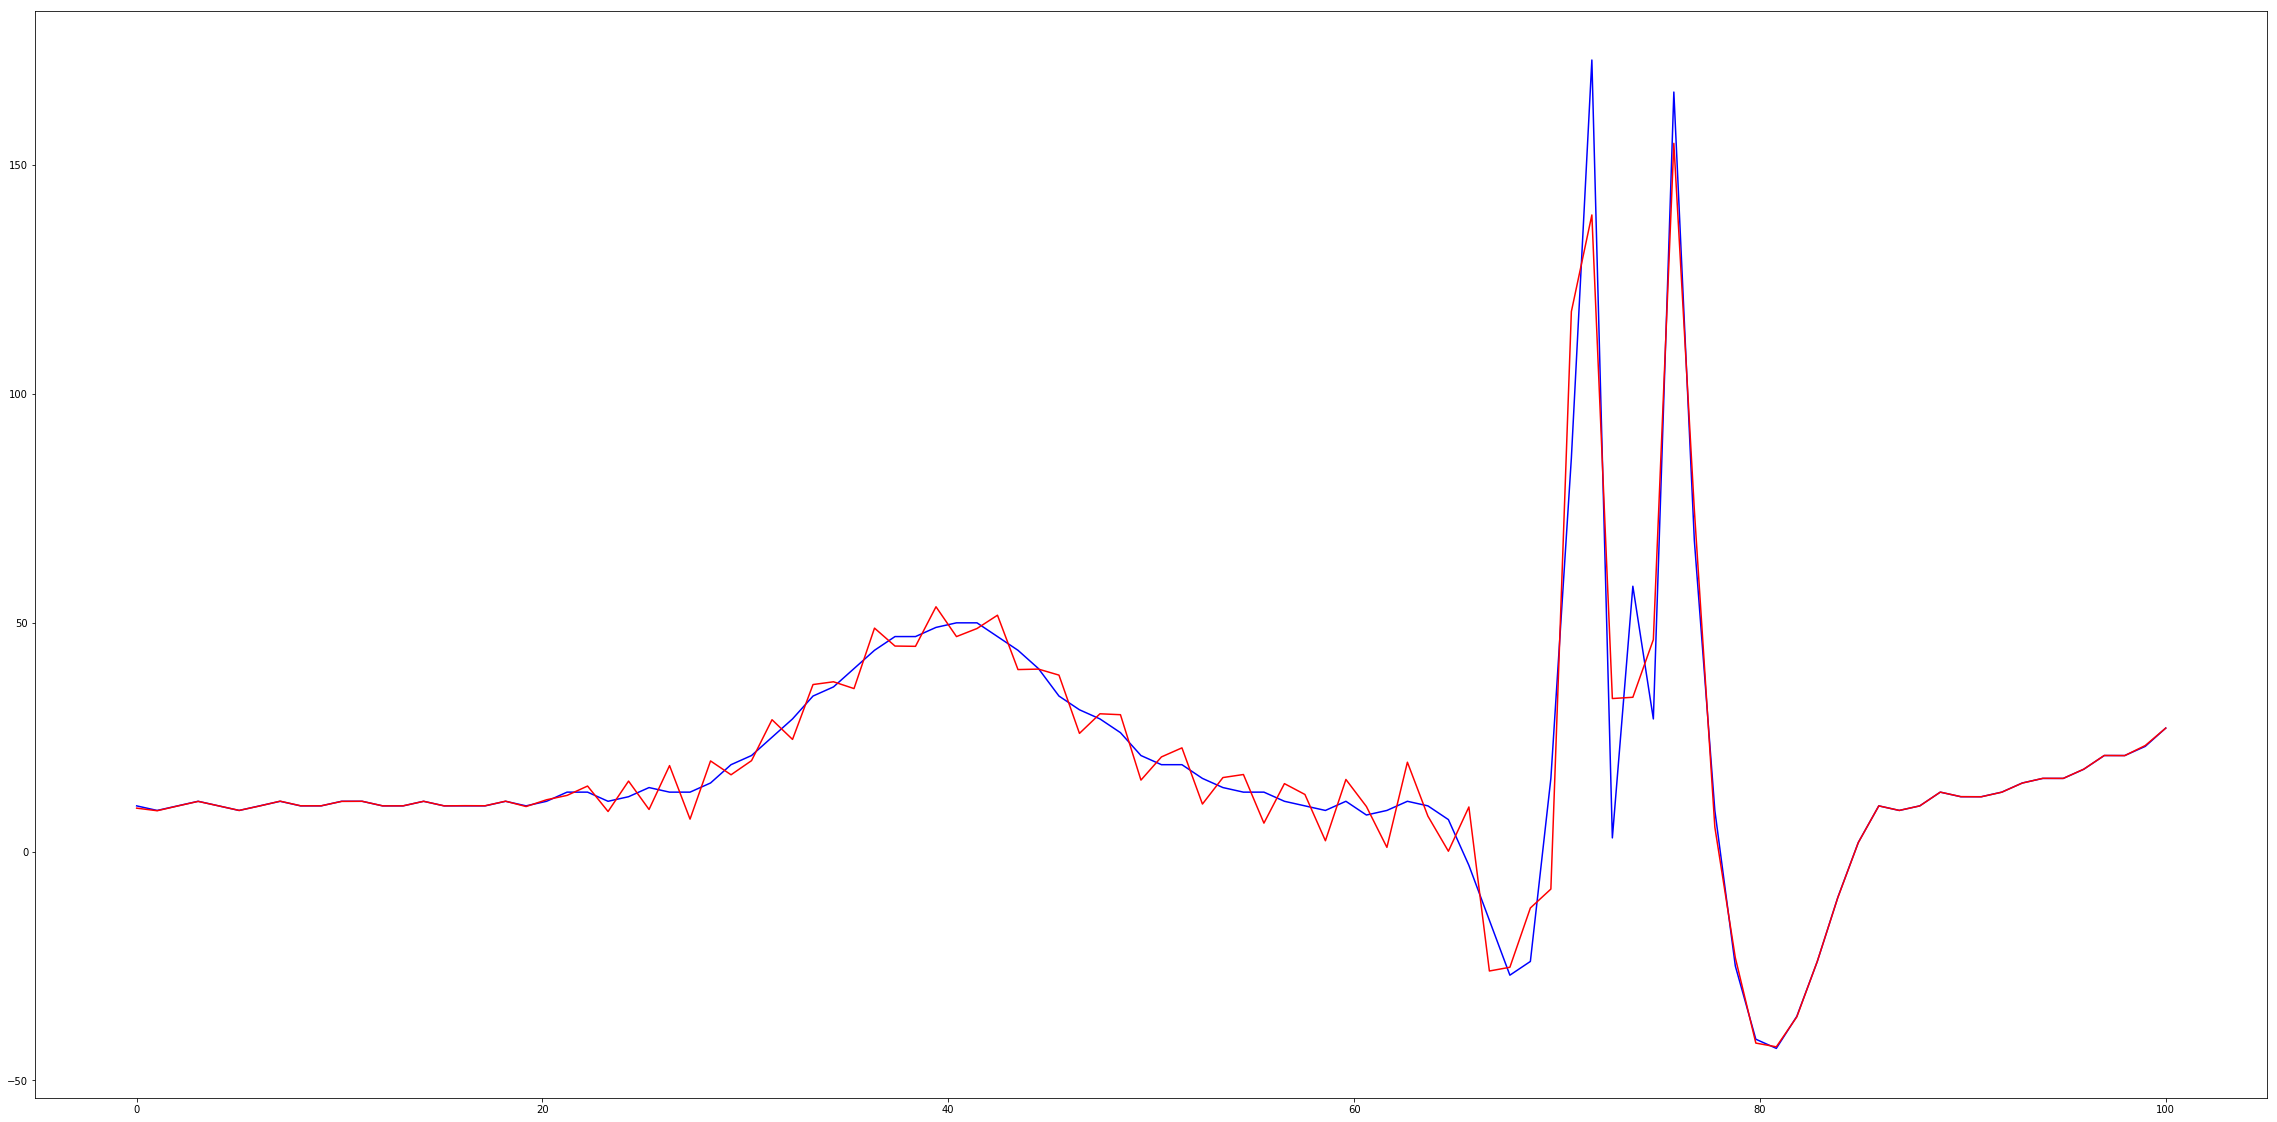

done


In [41]:
# Global Import
import numpy as np
import sys
from numpy import genfromtxt
import scipy.ndimage as ndimage

from numpy.polynomial import Chebyshev as T



# Custom Import
sys.path.insert(1, r'./functions')  # add to pythonpath
from smooth import *
from myplot import *
from ecg_util import *
from detect_peaks import detect_peaks

# Global Variable
# Visual
scale = 0.5
#FIGSIZE = (32*scale, 1.5*scale)

FIGSIZE = (40, 20)

my_data = genfromtxt('../database/II.csv', delimiter=',')

my_data = my_data[100:200]

# show original ecg
plt1 = drawLine(1, my_data, 'b', FIGSIZE, False)
#plt1.show()

# 
x = np.arange(0, len(my_data), 1)
print(' len x = ', len(x))
print(' len my_data = ', len(my_data))
# p30 = np.poly1d(np.polyfit(x, my_data, len(my_data)/2))
#p30 = np.poly1d(np.polyfit(x, my_data, 100))
p30 = T.fit(x, my_data, 90)

# Draw the polynormail
import matplotlib.pyplot as plt
#xp = np.linspace(0, len(my_data), 100)
drawLine(1, p30(x), 'r', FIGSIZE, False)
plt.show()

print('done')


 len x =  100
 len my_data =  100


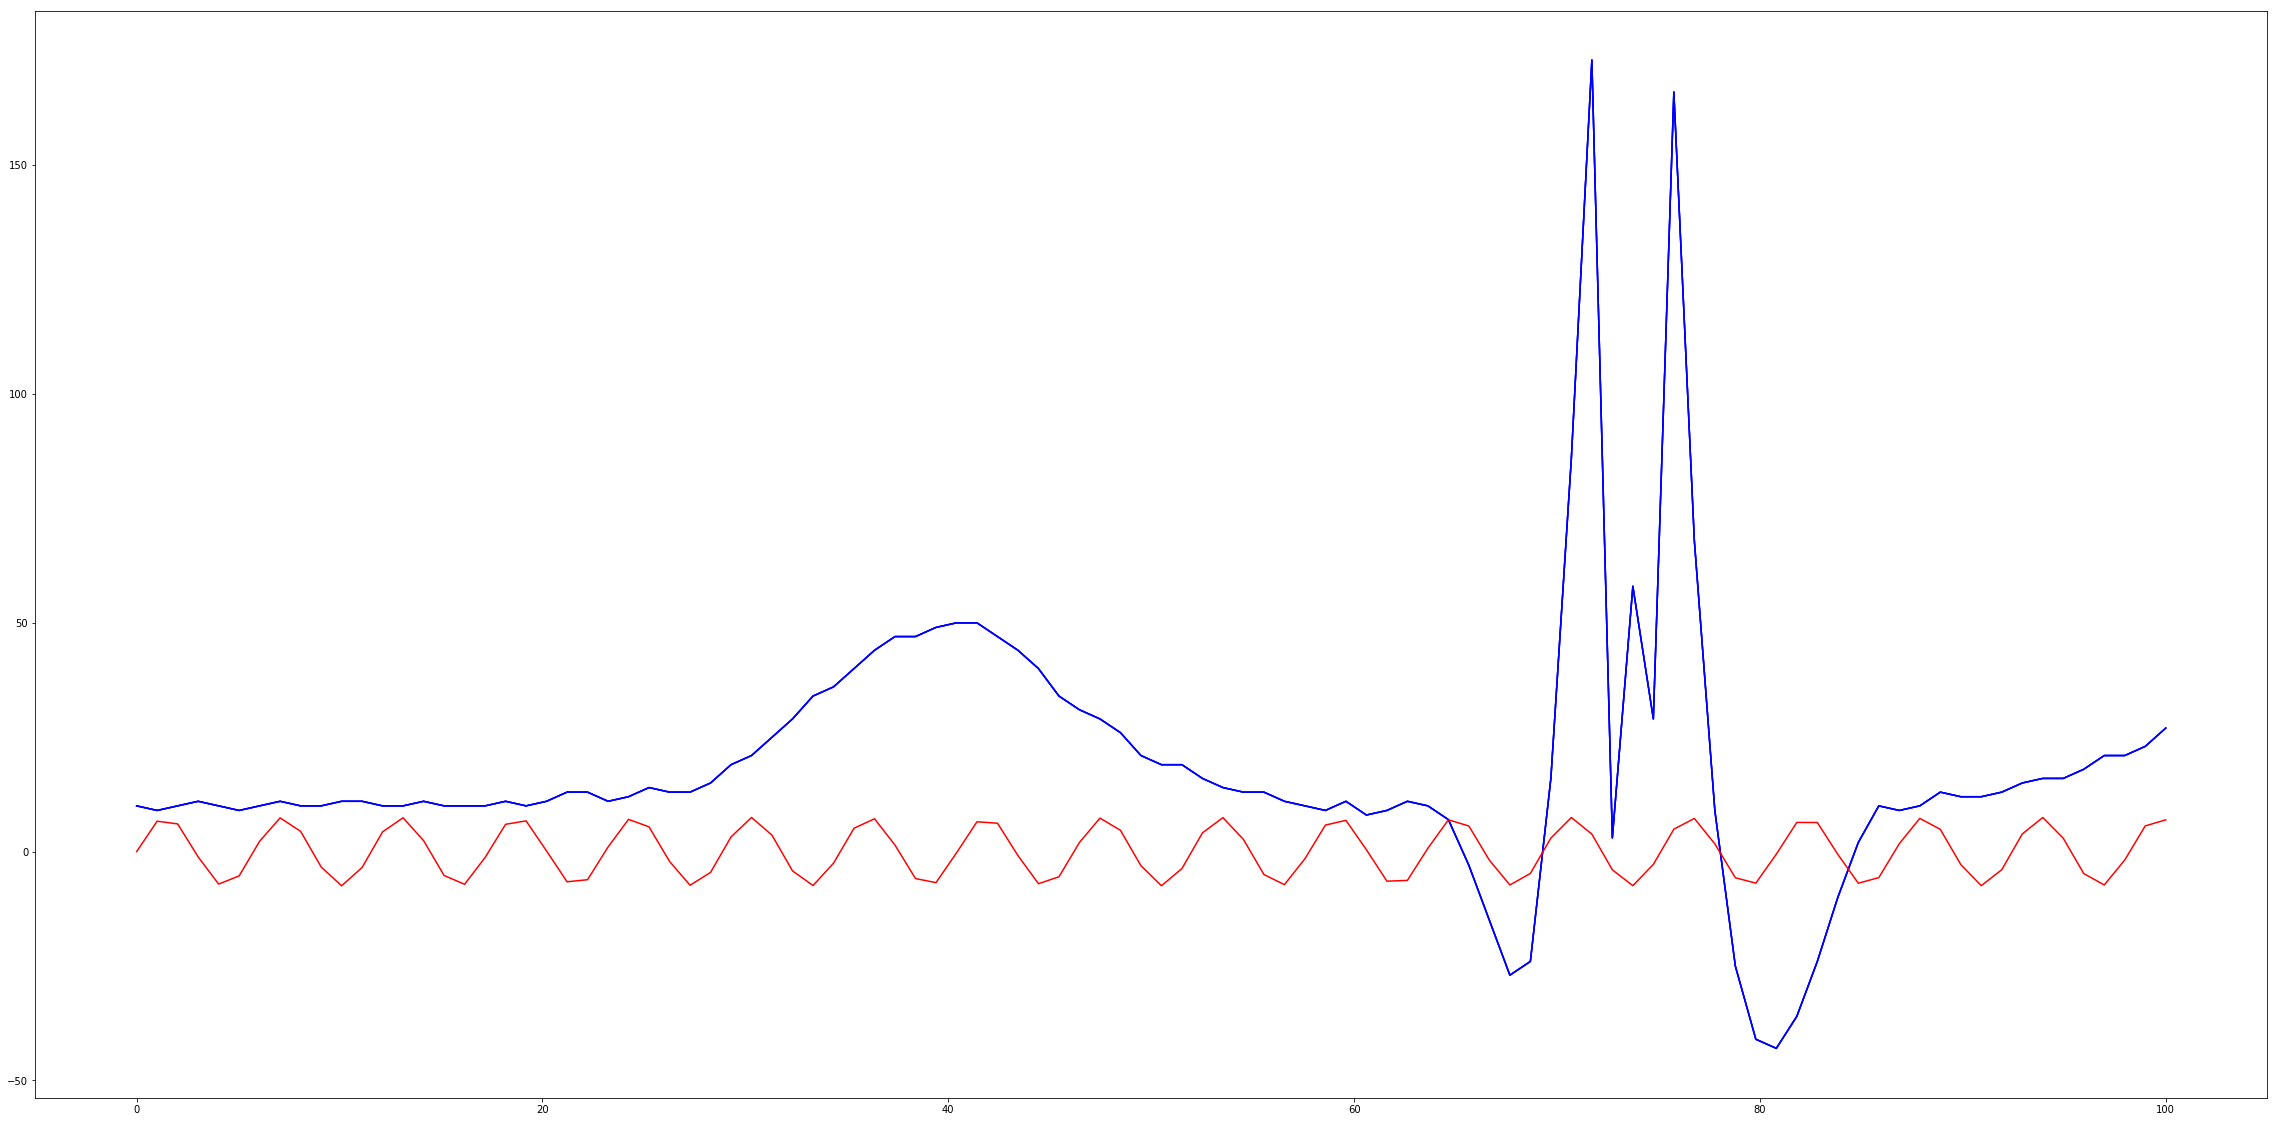

done


In [39]:



                       
                       # Global Import
import numpy as np
import sys
from numpy import genfromtxt
import scipy.ndimage as ndimage

from scipy import optimize




from numpy.polynomial import Chebyshev as T




# Custom Import
sys.path.insert(1, r'./functions')  # add to pythonpath
from smooth import *
from myplot import *
from ecg_util import *
from detect_peaks import detect_peaks



def test_func(x, a, b):
    return a * np.sin(b * x)


# Global Variable
# Visual
scale = 0.5
#FIGSIZE = (32*scale, 1.5*scale)

FIGSIZE = (40, 20)

my_data = genfromtxt('../database/iems/iEMS/II.csv', delimiter=',')

my_data = my_data[100:200]

# show original ecg
plt1 = drawLine(1, my_data, 'b', FIGSIZE, False)
#plt1.show()

# 
x = np.arange(0, len(my_data), 1)
print(' len x = ', len(x))
print(' len my_data = ', len(my_data))
# p30 = np.poly1d(np.polyfit(x, my_data, len(my_data)/2))
#p30 = np.poly1d(np.polyfit(x, my_data, 100))
#p30 = T.fit(x, my_data, 90)
popt, pcov = scipy.optimize.curve_fit(test_func, x, my_data)

# Draw the polynormail
import matplotlib.pyplot as plt
#xp = np.linspace(0, len(my_data), 100)
drawLine(1, test_func(x, popt[0], popt[1]), 'r', FIGSIZE, False)
plt.show()

print('done')